In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[:-5000]

In [5]:
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [6]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('float64'))

In [7]:
CLASS_NAMES = (
    "T-shirt/Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
)

In [8]:
CLASS_NAMES[y_train[0]]

'Ankle Boot'

In [20]:
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(300, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


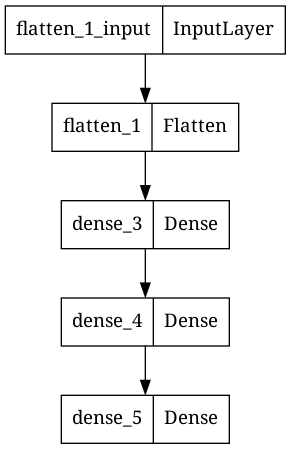

In [22]:
keras.utils.plot_model(model)

In [24]:
weights, biases = model.get_layer("dense_3").get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [27]:
weights, biases

(array([[ 5.3297073e-02,  2.4198458e-02, -2.1023259e-02, ...,
          3.5795525e-02, -7.2061256e-02,  4.6089381e-02],
        [ 2.2632368e-02,  5.9892908e-03,  1.4587238e-02, ...,
          8.7194145e-03,  4.9419701e-05,  2.4750374e-02],
        [-4.4513181e-02,  4.6743892e-02,  1.0291643e-02, ...,
         -4.6910450e-02,  1.4408320e-02,  5.3473756e-02],
        ...,
        [-6.0724389e-02, -2.6091568e-02, -2.8863657e-02, ...,
          4.1813411e-02,  3.5757974e-02,  7.3892877e-02],
        [-4.4557646e-02, -5.9672445e-02,  6.5973431e-02, ...,
         -5.0661370e-02, -2.6788648e-02,  5.1353276e-02],
        [-1.4996272e-02,  1.0063291e-02, -3.2075007e-02, ...,
          5.3060532e-02,  6.6655308e-02, -6.4764827e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [28]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)